## Importing all the necessary libraries and the dataset

In [30]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
# Data Cleanup (not needed for all problems but good to do anyways)
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

## Create a simple line plot with the pyplot module of matplotlib, using the number of job postings over the first 4 months of the year. Use the months as the x-axis and the number of postings as the y-axis. Below are the given variables.

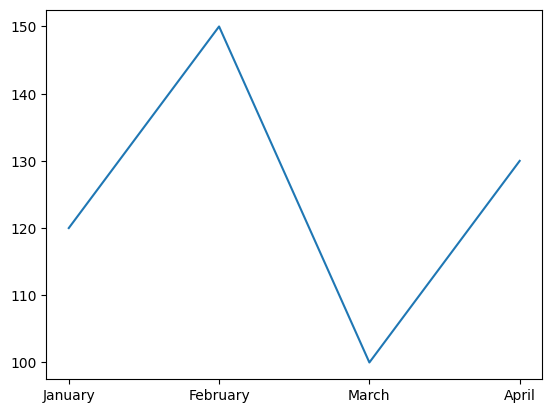

In [31]:
months = ["January", "February", "March", "April"]
postings = [120, 150, 100, 130]

plt.plot(months, postings)
plt.show()

## Create a bar chart showing the number of job postings for different job titles. Below are the given variables for the job_titles and the associated number of job postings.

<BarContainer object of 3 artists>

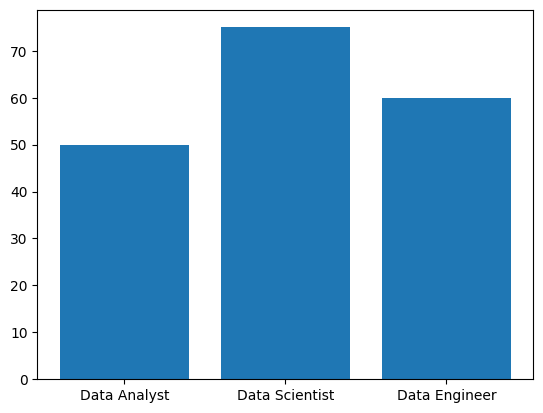

In [32]:
job_titles = ["Data Analyst", "Data Scientist", "Data Engineer"]
postings = [50, 75, 60]

plt.bar(job_titles, postings)

## Create a bar chart showing the number of job postings for the job_country. Use the job_country column and count the number of postings for each location. Only get the top 5 job countries. Additionally, change the color of the bars to 'orange'.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

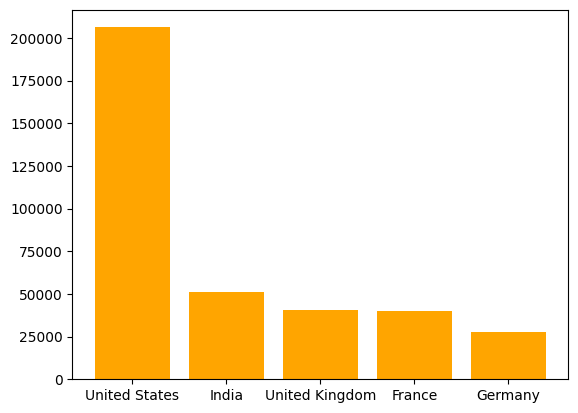

In [34]:
location_counts = df['job_country'].value_counts().head(5)
plt.bar(location_counts.index, location_counts.values, color='orange')
plt.show()

## Create a horizontal bar chart showing the average yearly salary for different job titles. Use the job_title_short and salary_year_avg columns to calculate the average salary for each job title.

<BarContainer object of 10 artists>

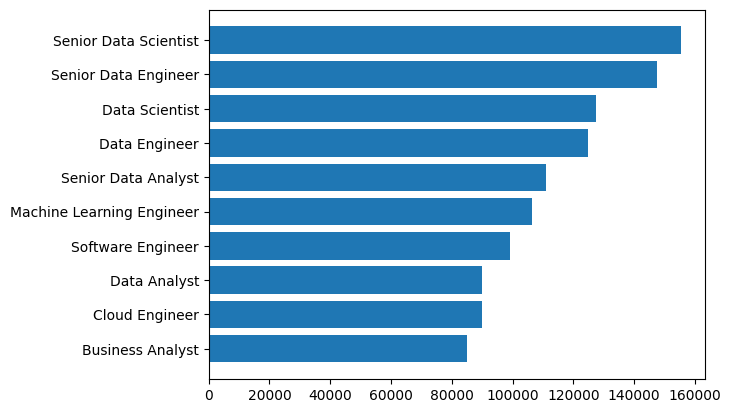

In [35]:
median_salary = df.groupby("job_title_short")["salary_year_avg"].median()
median_salary = median_salary.sort_values(ascending=True)
plt.barh(median_salary.index, median_salary.values)

## Create a line plot showing the trend of average yearly salary over the months of the year. Use the job_posted_date column to extract the month and calculate the average salary for each month.

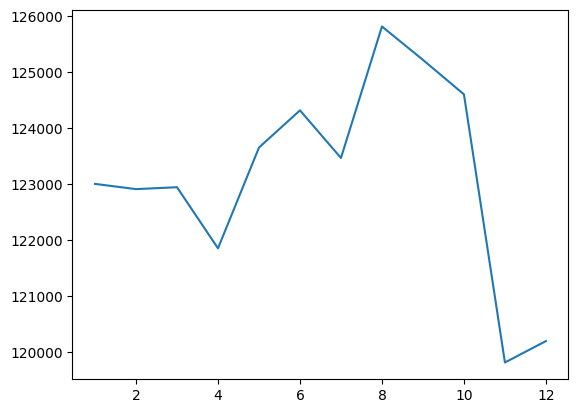

In [36]:
# Get the months
df["job_posted_month"] = df["job_posted_date"].dt.month
monthly_avg_salary = df.groupby("job_posted_month")["salary_year_avg"].mean().sort_index()

plt.plot(monthly_avg_salary.index, monthly_avg_salary.values)
plt.show()

## Using the same bar chart created in Matplotlib Plotting Question #1 showing the number of job postings for the job_country:
## Use the job_country column and count the number of postings for each location. Only get the top 5 job countries.
## Add labels for the x-axis (label as 'Country'), y-axis (label as 'Number of Postings'), and a title (set as 'Number of Jobs per Country') for the chart.
## Rotate the x-axis labels by 45 degrees and align them to the right.

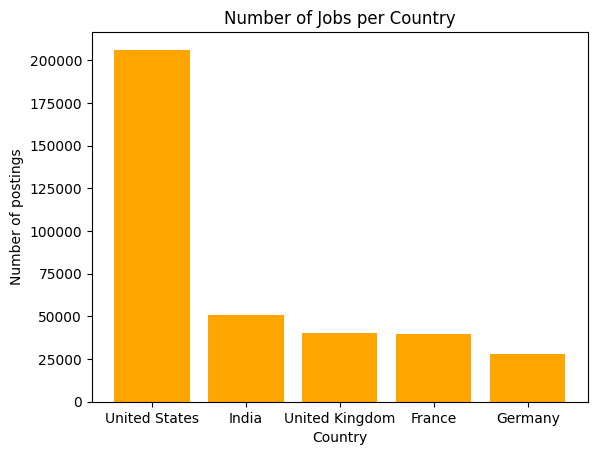

In [37]:
location_counts = df['job_country'].value_counts().head(5)
plt.bar(location_counts.index, location_counts.values, color='orange')
plt.xlabel("Country")
plt.ylabel("Number of postings")
plt.title("Number of Jobs per Country")
plt.show()

## Using the same bar chart created in Matplotlib Plotting Question #2 showing the average yearly salary for different job titles:

## Use the 'job_title_short' and salary_year_avg columns to calculate the average salary for each job title.
## Add labels for the x-axis (label as 'Average Salary') and a title (set as 'Average Salary by Job Title') for the plot.

<BarContainer object of 10 artists>

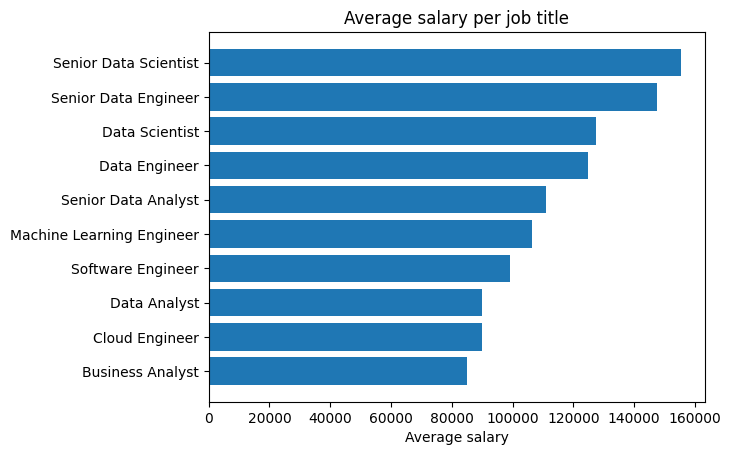

In [39]:
median_salary = df.groupby("job_title_short")["salary_year_avg"].median()
median_salary = median_salary.sort_values(ascending=True)
plt.title("Average salary per job title")
plt.xlabel("Average salary")
plt.barh(median_salary.index, median_salary.values)

## Using the same line plot created in Matplotlib Plotting Question #3 showing the trend of average yearly salary over the first 6 months of the year:

## Use the job_posted_date column to extract the month and calculate the average salary for each month.
## Add labels for the x-axis (label as 'Month'), y-axis (label as 'Average Salary'), and a title (set as 'Average Salary by Job Month') for the plot.
## Change the line color to 'red' and add a legend to the plot

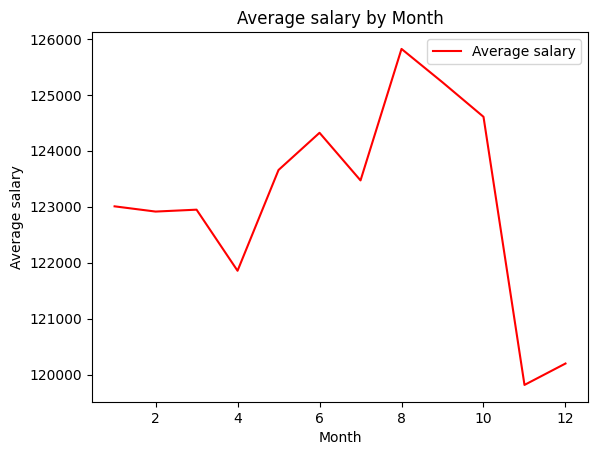

In [43]:
# Get the months
df["job_posted_month"] = df["job_posted_date"].dt.month
monthly_avg_salary = df.groupby("job_posted_month")["salary_year_avg"].mean().sort_index()

plt.plot(monthly_avg_salary.index, monthly_avg_salary.values, color="red", label="Average salary")
plt.xlabel("Month")
plt.ylabel("Average salary")
plt.title("Average salary by Month")
plt.legend()
plt.show()

## Create a bar plot with the Pandas .plot() method showing the top 5 job posting platforms (e.g., LinkedIn, Upwork, etc.) with the highest number of job postings. Use the job_via column to count the number of postings for each platform.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

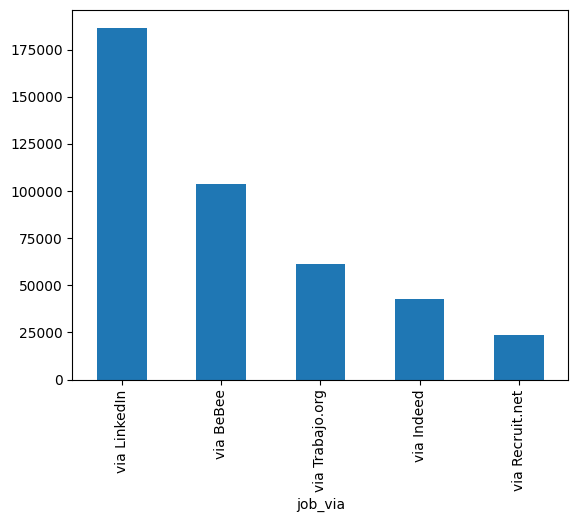

In [48]:
df_info = df.info()
print(df_info)
job_counts = df["job_via"].value_counts().head(5)
job_counts.plot(kind="bar")
plt.show()

## Create a line plot showing the trend of job postings over time using the Pandas method to plot:
    * reate a DataFrame called monthly_job_counts and use the job_posted_date column to count the number of job postings for each month (in the format 'Jan').
    * Add labels for the x-axis (label as 'Month'), y-axis (label as 'Number of Job Postings'), and a title (set as 'Trend of Job Postings Over Time') for the chart.

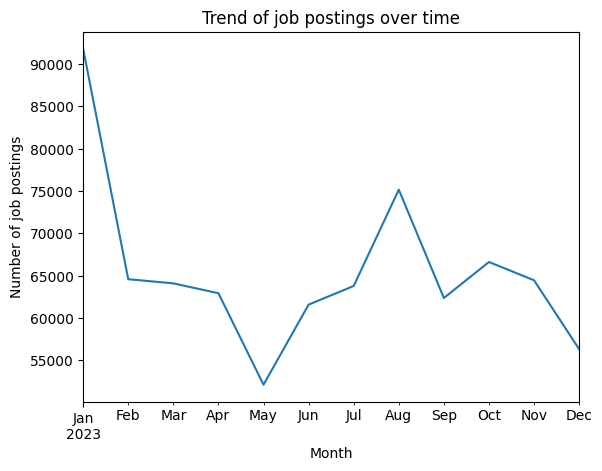

In [49]:
df["job_posted_month"] = df["job_posted_date"].dt.to_period("M")
monthly_job_counts = df["job_posted_month"].value_counts().sort_index()
monthly_job_counts.plot(kind="line")

plt.xlabel("Month")
plt.ylabel("Number of job postings")
plt.ylabel("Number of job postings")
plt.title("Trend of job postings over time")
plt.show()

## Create a horizontal bar plot showing the top 5 job locations with the highest number of job postings:

    * Use the job_location column to count the number of postings for each location.
    * Add in labels for the x-axis (label as 'Count of Jobs'), y-axis (label as 'Job Location'), and a title (set as 'Number of Job Postings by Job Location') for the chart.

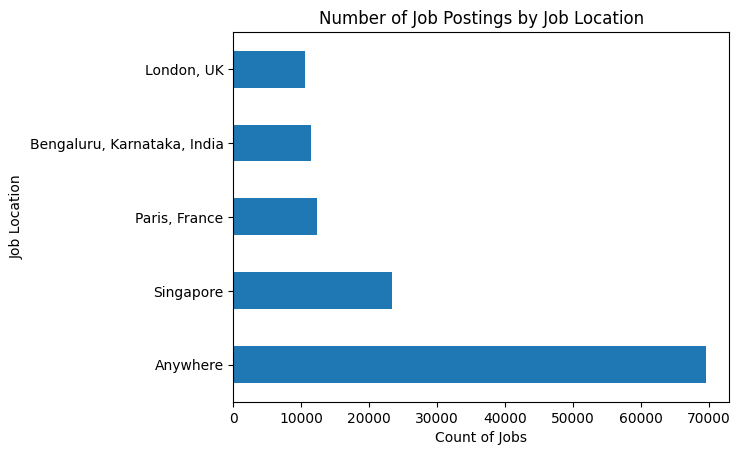

In [50]:
location_counts = df["job_location"].value_counts().head(5)
location_counts.plot(kind="barh")
plt.xlabel("Count of Jobs")
plt.ylabel("Job Location")
plt.title("Number of Job Postings by Job Location")
plt.show()